<a href="https://colab.research.google.com/github/manyakhare/The-Spark-Foundation-Task/blob/main/Manya_khare_mlproject_inflenza_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Given :
* there will be 75840 rows in our datasets
* 525 columns 
* task is of classification

**Goal** : By identifying influenza-related tweets, the goal is to forecast the spatiotemporal (relating to space-time) patterns of influenza outbreaks for different locations and dates.


**Given**:
* task is to predict whether or not influenza outbreak on the next date.
* More specifically, for influenza activity, there are four levels of flu activities from minimal to high according to CDC Flu Activity Map.

**Predict**: we have to predict one or zero

*The output is the occurrence of influenza outbreak for the specific state in the next week, which is zero if no event in the next week; or one, otherwise.**

## 1. Importing Dependencies

In [1]:
import scipy.io
import pandas as pd
import scipy.sparse
import numpy as np
import pandas as pd
import numpy as np

## 2. Reading Data in Mat format

In [ ]:
mat = scipy.io.loadmat("influenza_outbreak_dataset.mat")
mat
# for i in range(48):
#     print(len(mat['flu_X_tr'][0][i].todense()))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Mar 13 11:56:00 2020',
 '__version__': '1.0',
 '__globals__': [],
 'flu_X_tr': array([[<1095x545 sparse matrix of type '<class 'numpy.float64'>'
         	with 3573 stored elements in Compressed Sparse Column format>,
         <1095x545 sparse matrix of type '<class 'numpy.float64'>'
         	with 38755 stored elements in Compressed Sparse Column format>,
         <1095x545 sparse matrix of type '<class 'numpy.float64'>'
         	with 39884 stored elements in Compressed Sparse Column format>,
         <1095x545 sparse matrix of type '<class 'numpy.float64'>'
         	with 24440 stored elements in Compressed Sparse Column format>,
         <1095x545 sparse matrix of type '<class 'numpy.float64'>'
         	with 40711 stored elements in Compressed Sparse Column format>,
         <1095x545 sparse matrix of type '<class 'numpy.float64'>'
         	with 38987 stored elements in Compressed Sparse Column format>,
    

### Total Number of Attributes

In [ ]:
attributes = []
for i in  mat:
    attributes.append(i)
attributes

['__header__',
 '__version__',
 '__globals__',
 'flu_X_tr',
 'flu_Y_tr',
 'flu_X_te',
 'flu_Y_te',
 'flu_locs',
 'flu_keywords']

## 3. Extracting Training Data 

In [ ]:
X_training = []
for i in range(48):
    X_training.append(mat['flu_X_tr'][0][i].todense())
    
X_training = np.array(X_training)
X_training = X_training.reshape(X_training.shape[0]*X_training.shape[1],X_training.shape[2])
X_train = pd.DataFrame(X_training)


'''               *****************************************************************************'''

training =[]
for i in range(len(mat['flu_Y_tr'][0])):
    training.append(mat['flu_Y_tr'][0][i])

training = np.array(training)
training = training.reshape(-1,1)
Y_train = pd.DataFrame(training)

print("X_train : shape : "+ str(X_train.shape))
print("Y_train : shape : "+ str(Y_train.shape))

X_train : shape : (52560, 545)
Y_train : shape : (52560, 1)


## 2. Extracting Testing

In [ ]:
X_testing = []

for i in range(len(mat['flu_X_te'][0])):
    X_testing.append(mat['flu_X_te'][0][i].todense())
    
X_testing = np.array(X_testing)
X_testing= X_testing.reshape(X_testing.shape[0]*X_testing.shape[1],X_testing.shape[2])
X_test = pd.DataFrame(X_testing)


'''***********************************************************************************'''

testing=[]
for i in range(len(mat['flu_Y_te'][0])):
    testing.append(mat['flu_Y_te'][0][i])

testing = np.array(testing)
testing = testing.reshape(-1,1)
Y_test = pd.DataFrame(testing)
Y_train = pd.DataFrame(training)

print("X_test : shape : "+ str(X_test.shape))
print("Y_test : shape : "+ str(Y_test.shape))

X_test : shape : (23280, 545)
Y_test : shape : (23280, 1)


# Location

In [ ]:
location=[]
for i in range(len(mat['flu_locs'][0])):
    location.append(mat['flu_locs'][0][i][0])


# Keywords Used 

In [ ]:
keyword=[]
for i in range(len(mat['flu_keywords'][0])):
    keyword.append(mat['flu_keywords'][0][i][0])
len(keyword)

525

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,535,536,537,538,539,540,541,542,543,544
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52556,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
52557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. Working on X_train

In [ ]:
X_train.shape 


(52560, 545)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Columns: 545 entries, 0 to 544
dtypes: float64(545)
memory usage: 218.5 MB


In [ ]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,535,536,537,538,539,540,541,542,543,544
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,...,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,1.076636,1.780137,2.172945,2.465373,2.704890,2.917218,3.091781,3.254357,3.409817,3.561986,...,0.011929,0.011358,0.044463,0.013527,0.412005,0.039593,0.005156,0.018893,0.105327,0.010312
std,2.725740,3.661912,4.317834,4.826208,5.233899,5.609713,5.895678,6.182278,6.456202,6.730221,...,0.111849,0.122462,0.231432,0.183168,1.024046,0.253539,0.078950,0.154970,0.408786,0.112771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,152.000000,202.000000,221.000000,230.000000,238.000000,238.000000,254.000000,267.000000,272.000000,277.000000,...,2.000000,11.000000,7.000000,26.000000,32.000000,13.000000,4.000000,5.000000,10.000000,3.000000


# 6. Data Preprocessing 

## 1. Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)


In [ ]:
X_train.std()

0.9999999999999921

## 2. Applying PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=330)
X_train_trf= pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)


In [ ]:
X_train.shape 
X_train_trf.shape

(52560, 330)

In [ ]:
np.linalg.det(np.cov(X_train_trf,rowvar=0))

1.915574382380117

we are doing hit and trial so that we could get maximum number of feature 

# Applying algorithms 

**This is Binary Classification Problem**

## 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_trf,Y_train)
y_pred = lr.predict(X_test_trf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y_test)

0.903307560137457

## 2. K Nearest Neighbour 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_trf,Y_train)
y_pred = knn.predict(X_test_trf)

accuracy_score(y_pred,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9021048109965636

# 3. Decision Tree
* versatile
* require very less data preparation.
* scaling or centering is not required at all
* traversing the Decision Tree
requires going through roughly O(log2
(m)) node,independent of the number of features. So predictions are very fast, even when deal‐
ing with large training sets.
* by default gini impurity is selected but we can adjust it using criterian hyper parameter to entropy. 
* gini impurity tends to isolate the most frequent class in its own branches of the tree, while entropy tends to produce slightly more balanced trees.



Here :
* node’s **value** attribute tells you how many training instances of each class this node
applies to
* a node’s **gini** attribute measures its impur‐
ity: a node is “pure” (gini=0) if all training instances it applies to belong to the same
class. 
        

In [ ]:
!pip install dtreeviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[Text(0.5, 0.8333333333333334, 'X[1] <= -3.803\ngini = 0.104\nsamples = 52560\nvalue = [49655, 2905]'),
 Text(0.25, 0.5, 'X[0] <= 13.553\ngini = 0.499\nsamples = 780\nvalue = [373, 407]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.416\nsamples = 264\nvalue = [186, 78]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.462\nsamples = 516\nvalue = [187, 329]'),
 Text(0.75, 0.5, 'X[3] <= -0.742\ngini = 0.092\nsamples = 51780\nvalue = [49282, 2498]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.299\nsamples = 4135\nvalue = [3378, 757]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.07\nsamples = 47645\nvalue = [45904, 1741]')]

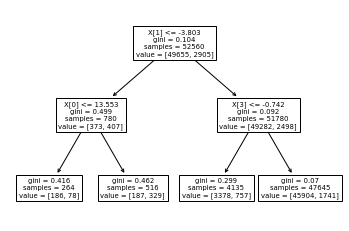

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import *
from IPython.display import Image,display_svg,SVG
from sklearn.tree import plot_tree

dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train_trf,Y_train)
plot_tree(dt)

# Hyper Parameter Tunning :


In [ ]:
param_grid = {
    'max_depth' : [2,4,6,8,10,None],
    'criterion' : ['entropy','gini'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

from sklearn.model_selection import GridSearchCV

reg = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
reg.fit(X_train_trf,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [ ]:
reg.predict(X_test_trf)


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
# Estimating Class Probability
# A Decision Tree can also estimate the probability that an instance belongs to a partic‐
# ular class k: first it traverses the tree to find the leaf node for this instance, and then it
# returns the ratio of training instances of class k in this node. 


y_pred = dt.predict(X_test_trf)
dt.predict_proba(X_test_trf)
accuracy_score(y_pred,Y_test)

0.9026632302405498

# 4. Support Vector Machine

In [ ]:
# from sklearn.svm import SVC

# svm = SVC()
# svm.fit(X_train_trf,Y_train)
# y_pred = svm.predict(X_test_trf)

#not using svc because this is slow

In [ ]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=1,loss="hinge")
linear_svc.fit(X_train_trf,Y_train)
y_pred = linear_svc.predict(X_test_trf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
accuracy_score(y_pred,Y_test)

0.901159793814433

In [ ]:
# from sklearn.svm import SVC
# # parameter coef0 controls how much the model is influenced by highdegree polynomials versus low-degree polynomia
# poly_kernel = SVC(kernel="poly",degree=3,coef0=1,C=5)
# poly_kernel.fit(X_train_trf,Y_train)
# poly_kernel.predict(X_test_trf)


# 5. Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_trf,Y_train)
gnb.predict(X_test_trf)

accuracy_score(y_pred,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.901159793814433

# Calculating Posterior Probability

In [ ]:
gnb.classes_ 

array([0, 1], dtype=uint8)

In [ ]:
gnb.predict_proba(X_test_trf)

array([[1.00000000e+00, 5.67756933e-85],
       [1.00000000e+00, 2.70018943e-86],
       [1.00000000e+00, 2.70018943e-86],
       ...,
       [1.00000000e+00, 2.70018943e-86],
       [1.00000000e+00, 2.70018943e-86],
       [1.00000000e+00, 2.70018943e-86]])

 # Ensemble Learning
since we are getting 90 % accuracy from each model lets try to ensemble this model to get more better accuracy

 # 1. Voting

In [ ]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svc_clf = SVC()

voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svc_clf)],
 voting='soft')

voting_clf.fit(X_train_trf,Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())],
                 voting='soft')

# 2. Bagging and Pasting in Scikit-Learn

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


bag_clf = BaggingClassifier(
    # default perform soft voting
base_estimator=DecisionTreeClassifier(),
n_estimators=500,
max_samples=100,
bootstrap=True, #for bagging - with replacement 
n_jobs=-1, # number of cpu cores)
oob_score=True
)
bag_clf.fit(X_train_trf,Y_train)
y_pred = bag_clf.predict(X_test_trf)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
